In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression

drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/PSC2/derm.csv')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print("Aperçu des données :")
print(df.head())
print("\nInfos générales :")
print(df.info())
print("\nStatistiques descriptives :")
print(df.describe())

Aperçu des données :
   erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0         2        2                 0        3                   0   
1         3        3                 3        2                   1   
2         2        1                 2        3                   1   
3         2        2                 2        0                   0   
4         2        3                 2        2                   2   

   polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0                  0                   0                         0   
1                  0                   0                         0   
2                  3                   0                         3   
3                  0                   0                         0   
4                  2                   0                         2   

   knee_and_elbow_involvement  scalp_involvement  ...  \
0                           1                  0  ...   
1                

In [ ]:

# 4. Valeurs manquantes
print("\nValeurs manquantes par colonne :")
print(df.isnull().sum())


Valeurs manquantes par colonne :
erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
pnl_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0


In [ ]:
# 5. Suppression des doublons
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(366, 35)

In [ ]:
df=df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 358 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   erythema                                  358 non-null    int64  
 1   scaling                                   358 non-null    int64  
 2   definite_borders                          358 non-null    int64  
 3   itching                                   358 non-null    int64  
 4   koebner_phenomenon                        358 non-null    int64  
 5   polygonal_papules                         358 non-null    int64  
 6   follicular_papules                        358 non-null    int64  
 7   oral_mucosal_involvement                  358 non-null    int64  
 8   knee_and_elbow_involvement                358 non-null    int64  
 9   scalp_involvement                         358 non-null    int64  
 10  family_history                            3

In [ ]:
# 6. Types de données
print("\nTypes des colonnes :")
print(df.dtypes)



Types des colonnes :
erythema                                      int64
scaling                                       int64
definite_borders                              int64
itching                                       int64
koebner_phenomenon                            int64
polygonal_papules                             int64
follicular_papules                            int64
oral_mucosal_involvement                      int64
knee_and_elbow_involvement                    int64
scalp_involvement                             int64
family_history                                int64
melanin_incontinence                          int64
eosinophils_in_the_infiltrate                 int64
pnl_infiltrate                                int64
fibrosis_of_the_papillary_dermis              int64
exocytosis                                    int64
acanthosis                                    int64
hyperkeratosis                                int64
parakeratosis                             

In [ ]:
# 7. Encodage des colonnes catégorielles (si besoin)
cat_cols = df.select_dtypes(include='object').columns
if len(cat_cols) > 0:
    df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

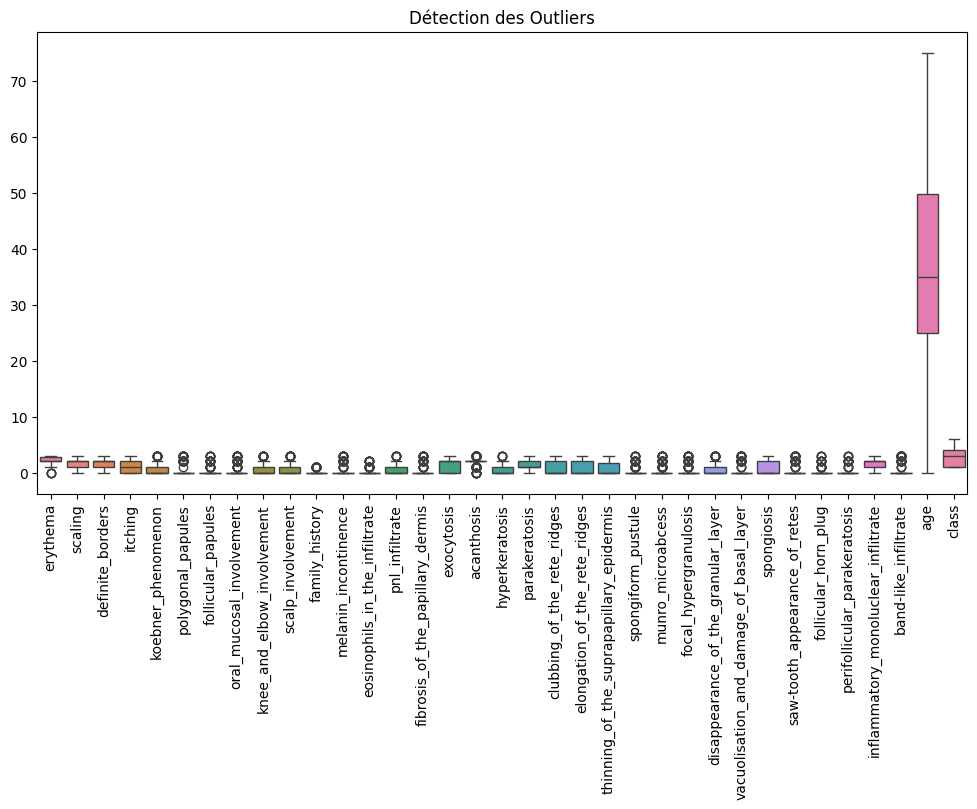

In [ ]:
# 8. Détection et visualisation des outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=np.number))
plt.title("Détection des Outliers")
plt.xticks(rotation=90)
plt.show()

In [ ]:
from scipy.stats.mstats import winsorize

# Calculate outlier counts for each numerical column
Q1 = df.select_dtypes(include=np.number).quantile(0.25)
Q3 = df.select_dtypes(include=np.number).quantile(0.75)
IQR = Q3 - Q1
outlier_counts = ((df.select_dtypes(include=np.number) < (Q1 - 1.5 * IQR)) | (df.select_dtypes(include=np.number) > (Q3 + 1.5 * IQR))).sum()

# Application de winsorization à toutes les colonnes numériques avec outliers détectés
cols_to_winsorize = outlier_counts[outlier_counts > 0].index.tolist()

for col in cols_to_winsorize:
    df[col] = winsorize(df[col], limits=[0.05, 0.05])  # couper les 5% les plus extrêmes

print("Winsorization appliquée proprement.")


Winsorization appliquée proprement.


In [ ]:
df.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55.0,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8.0,1
2,2,1,2,3,1,3,0,2,0,0,...,0,2,3,2,0,0,2,3,26.0,3
3,2,2,2,0,0,0,0,0,3,2,...,2,0,0,0,0,0,3,0,40.0,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45.0,3


In [ ]:
from sklearn.preprocessing import StandardScaler
# 9. Normalisation (sans la target si tu l’as)
# Supposons que la colonne cible est 'age_biologique'
target = 'age'  # à adapter si c’est un autre nom
if target in df.columns:
    X = df.drop(columns=target)
    y = df[target]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
    df_cleaned = pd.concat([df_scaled, y.reset_index(drop=True)], axis=1)
else:
    print("⚠️ Colonne 'age_biologique' non trouvée. Je te laisse vérifier le nom exact.")
    df_cleaned = df.copy()

In [ ]:
df.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55.0,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8.0,1
2,2,1,2,3,1,3,0,2,0,0,...,0,2,3,2,0,0,2,3,26.0,3
3,2,2,2,0,0,0,0,0,3,2,...,2,0,0,0,0,0,3,0,40.0,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45.0,3


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # X défini plus tôt

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [ ]:
#10 Définir les intervalles que tu veux
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100,110,120]
# Adjust labels to match the number of bins - 1
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100-109', '110-119']

# Appliquer la transformation sur ton DataFrame existant
df['age_interval'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

In [ ]:
df.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,age,class,age_interval
0,2,2,0,3,0,0,0,0,1,0,...,0,3,0,0,0,1,0,55.0,2,50-59
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,1,0,8.0,1,0-9
2,2,1,2,3,1,3,0,2,0,0,...,2,3,2,0,0,2,3,26.0,3,20-29
3,2,2,2,0,0,0,0,0,3,2,...,0,0,0,0,0,3,0,40.0,1,40-49
4,2,3,2,2,2,2,0,2,0,0,...,3,2,3,0,0,2,3,45.0,3,40-49


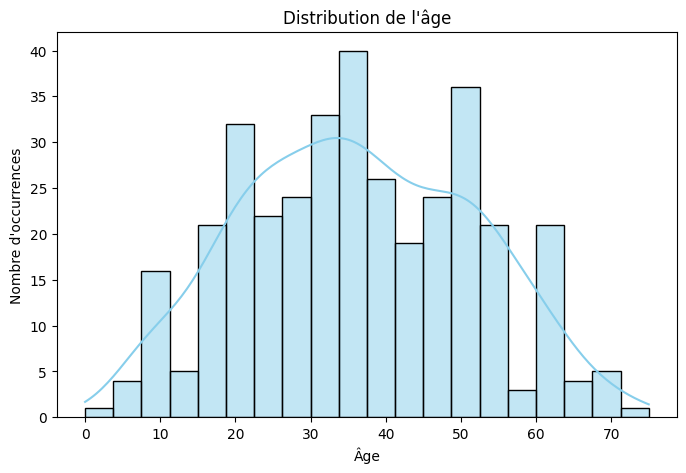

In [ ]:
#11 Visualisation de la distribution de l'âge
plt.figure(figsize=(8, 5))
sns.histplot(df["age"], bins=20, kde=True, color="skyblue")
plt.title("Distribution de l'âge")
plt.xlabel("Âge")
plt.ylabel("Nombre d'occurrences")
plt.show()

<ipython-input-48-c04d221a0542>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["class"], palette="viridis")


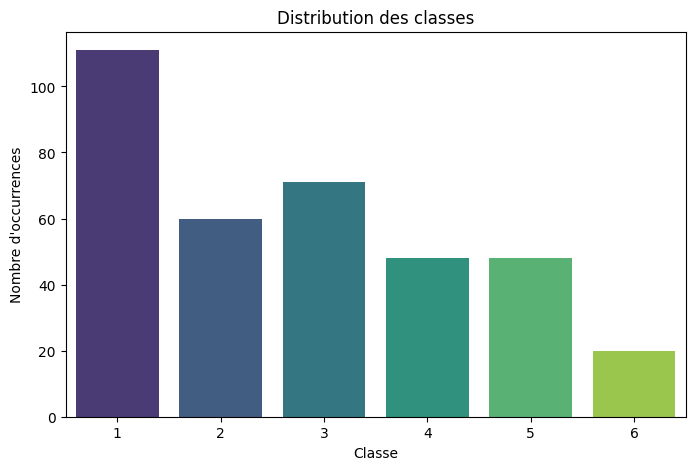

In [ ]:
#12 Visualisation de la distribution des classes
plt.figure(figsize=(8, 5))
sns.countplot(x=df["class"], palette="viridis")
plt.title("Distribution des classes")
plt.xlabel("Classe")
plt.ylabel("Nombre d'occurrences")
plt.show()

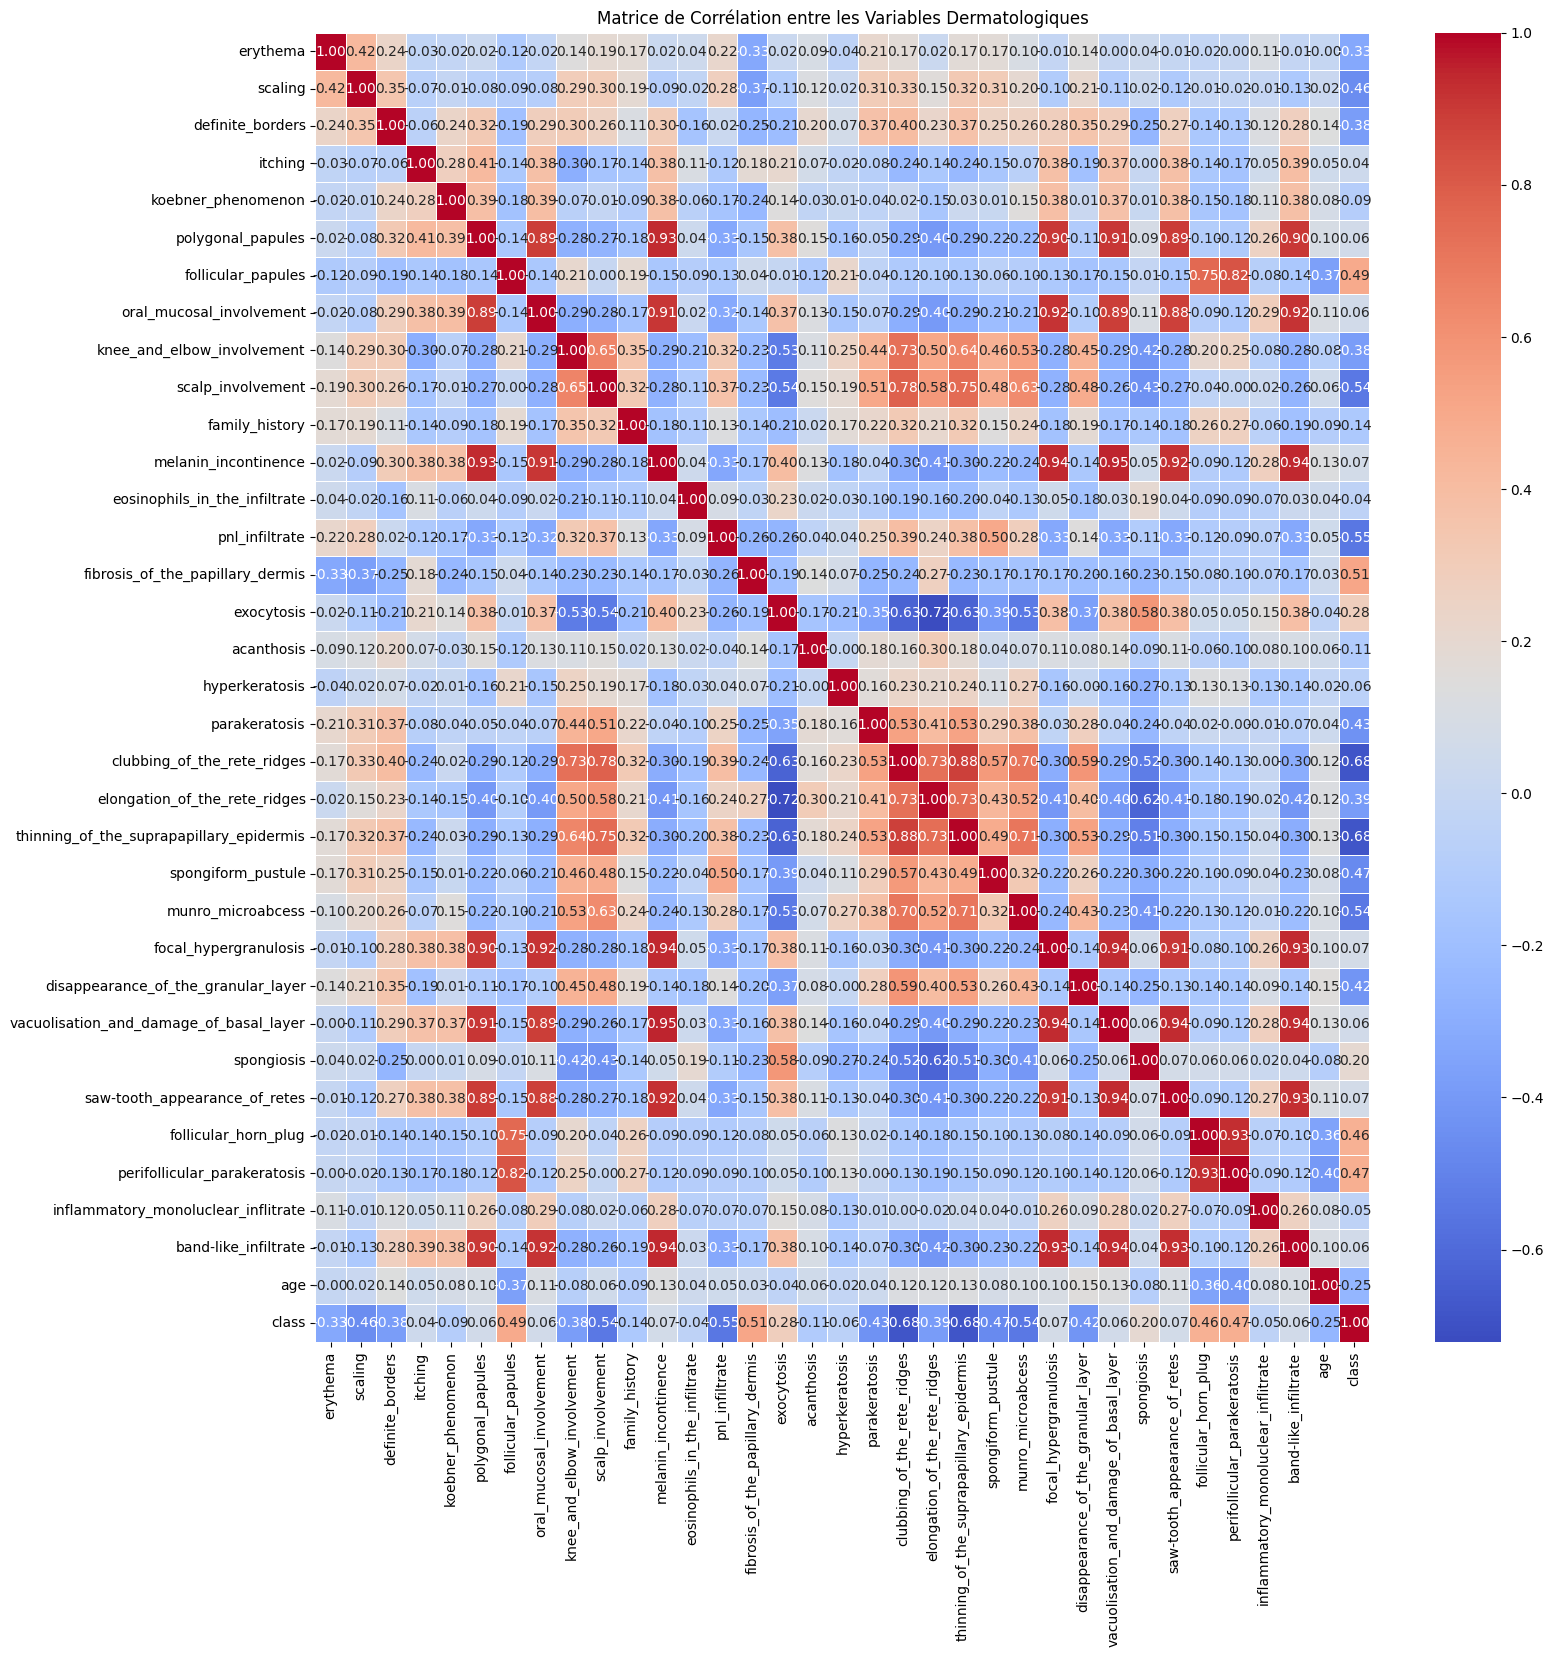

In [ ]:
# Calcul de la matrice de corrélation
corr_matrix = df.corr(numeric_only=True)

# Affichage avec une heatmap
plt.figure(figsize=(17,17))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrice de Corrélation entre les Variables Dermatologiques")
plt.show()

In [ ]:
df = df.drop(columns=['class'])

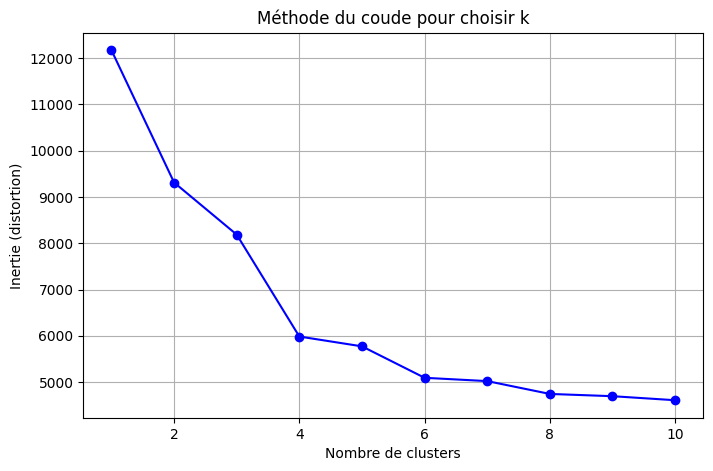

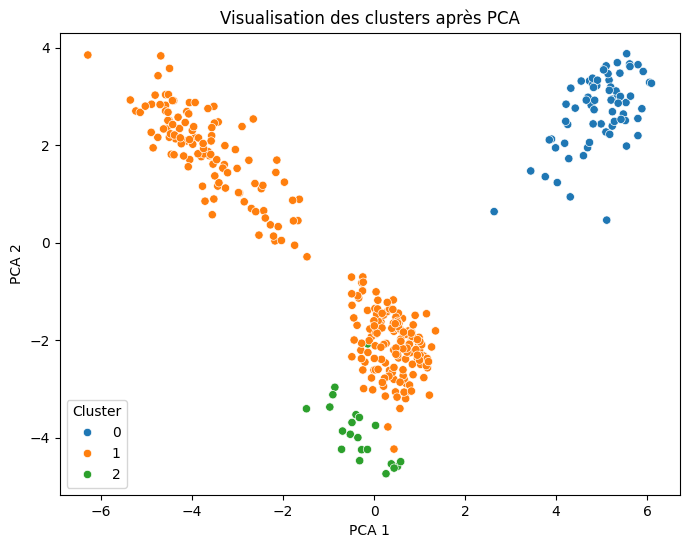


Statistiques moyennes par cluster :


,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,class,age
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.014458,-0.247601,0.587739,0.805361,0.772677,1.903282,-0.305475,1.883039,-0.601415,-0.567022,...,-0.253905,1.928873,0.144530,1.917330,-0.197236,-0.249629,0.579362,1.951889,0.136883,39.957746
1,-0.004585,0.071201,-0.115230,-0.160406,-0.150833,-0.470847,-0.178399,-0.465839,0.081002,0.152310,...,0.112265,-0.476891,-0.058770,-0.474035,-0.240229,-0.249629,-0.125470,-0.484529,-0.186693,37.251880
2,0.009192,-0.064745,-0.527532,-0.691078,-0.701834,-0.470847,3.292523,-0.465839,1.007330,-0.012190,...,-0.563577,-0.480813,0.255769,-0.477957,3.709752,4.005948,-0.369512,-0.461877,1.901982,11.809524


In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

X_cluster = df_cleaned.drop(columns=['age'], errors='ignore')

inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_cluster)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Nombre de clusters')
plt.ylabel("Inertie (distortion)")
plt.title("Méthode du coude pour choisir k")
plt.grid(True)
plt.show()

k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
df_cleaned['cluster'] = kmeans.fit_predict(X_cluster)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df_cleaned['cluster'], palette="tab10")
plt.title("Visualisation des clusters après PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.show()


print("\nStatistiques moyennes par cluster :")
display(df_cleaned.groupby('cluster').mean())


In [ ]:
#application des modeles
#1. Séparation des Features et Target
from sklearn.model_selection import train_test_split

# X = toutes les colonnes sauf "age" (et "age_interval" si présente)
X = df.drop(['age', 'age_interval'], axis=1)

# y = la colonne à prédire
y = df['age']

# Split en 80% train / 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#importation des bibliotheques
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Régressions
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


In [ ]:
#Entrainement des modéles de regression(lineaire,rendom forest,gradient boosting)
# Initialisation des modèles
models = {
    "Régression Linéaire": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Évaluation
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MAE": mae, "MSE": mse, "R2": r2}

    print(f"\n {name}")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"R²: {r2:.2f}")



 Régression Linéaire
MAE: 11.19
MSE: 192.38
R²: 0.00

 Random Forest
MAE: 11.51
MSE: 189.01
R²: 0.02

 Gradient Boosting
MAE: 12.13
MSE: 223.54
R²: -0.16


In [ ]:
#optimiser les parametres
from sklearn.model_selection import GridSearchCV

#GridSearch pour RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf,
                       cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_rf.fit(X_train, y_train)

print(" Meilleurs paramètres Random Forest :", grid_rf.best_params_)
print(" Meilleure MAE :", -grid_rf.best_score_)

#GridSearch pour GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_gb = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid_gb,
                       cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_gb.fit(X_train, y_train)

print(" Meilleurs paramètres Gradient Boosting :", grid_gb.best_params_)
print(" Meilleure MAE :", -grid_gb.best_score_)



 Meilleurs paramètres Random Forest : {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
 Meilleure MAE : 12.159977719198494
 Meilleurs paramètres Gradient Boosting : {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
 Meilleure MAE : 12.088230371143002


In [ ]:
#utiliser SVR et KNN
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

models_improved = {
    "SVR (RBF kernel)": SVR(kernel='rbf'),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5)
}

for name, model in models_improved.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\n {name}")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"R²: {r2:.2f}")



 SVR (RBF kernel)
MAE: 11.36
MSE: 183.15
R²: 0.05

 KNN Regressor
MAE: 11.51
MSE: 195.62
R²: -0.01


In [ ]:
#optimiser les parametres
from sklearn.model_selection import GridSearchCV

#GridSearch pour RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf,
                       cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_rf.fit(X_train, y_train)

print("🔍 Meilleurs paramètres Random Forest :", grid_rf.best_params_)
print("📉 Meilleure MAE :", -grid_rf.best_score_)



🔍 Meilleurs paramètres Random Forest : {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
📉 Meilleure MAE : 12.159977719198494


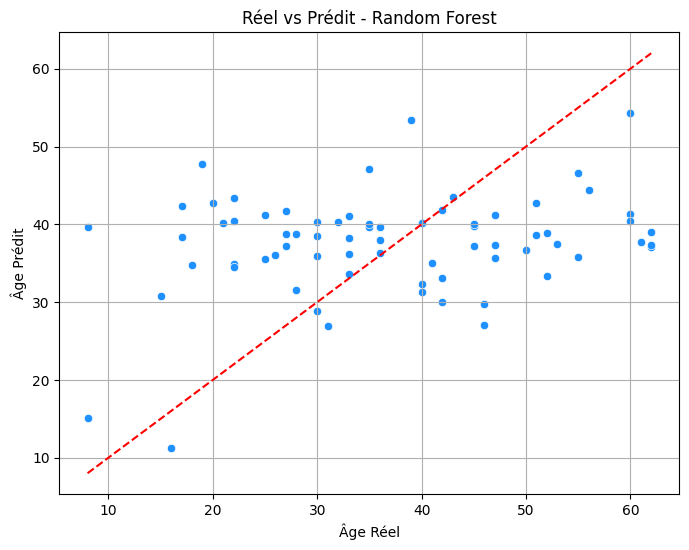

In [ ]:
#Performances reels vs predites
# Exemple de visualisation pour le meilleur modèle (ex: Random Forest)
best_model = RandomForestRegressor(random_state=42)
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_best, color='dodgerblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Âge Réel")
plt.ylabel("Âge Prédit")
plt.title("Réel vs Prédit - Random Forest")
plt.grid(True)
plt.show()


In [ ]:
#Appliquer la classification
# Suppression des colonnes non nécessaires
X = df.drop(columns=['age', 'age_interval'])
y = df['age_interval']



In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [ ]:
#standarisation
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Modelisation Random Forest
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


In [ ]:
#evaluation
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))

# Get the unique classes present in y_test or y_pred
unique_classes = np.unique(np.concatenate((y_test, y_pred)))

# Use the unique classes as target names
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_[unique_classes]))

[[0 2 0 0 0 0 0]
 [1 0 1 4 0 0 0]
 [0 0 3 6 2 1 2]
 [0 0 4 2 5 4 2]
 [0 2 2 6 2 4 1]
 [0 1 0 1 3 3 1]
 [0 0 0 5 0 1 1]]
              precision    recall  f1-score   support

         0-9       0.00      0.00      0.00         2
       10-19       0.00      0.00      0.00         6
       20-29       0.30      0.21      0.25        14
       30-39       0.08      0.12      0.10        17
       40-49       0.17      0.12      0.14        17
       50-59       0.23      0.33      0.27         9
       60-69       0.14      0.14      0.14         7

    accuracy                           0.15        72
   macro avg       0.13      0.13      0.13        72
weighted avg       0.16      0.15      0.15        72



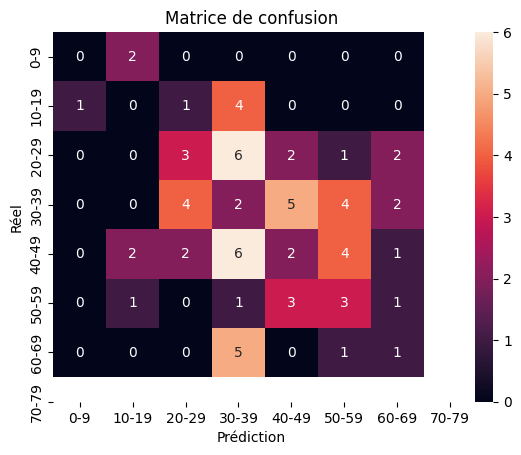

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Prédiction')
plt.ylabel('Réel')
plt.title('Matrice de confusion')
plt.show()
